# Training on the Fashion MNIST dataset

## Importing required modules

In [1]:
from __future__ import absolute_import, division, print_function

# import TensforFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds

# Helper libs
import math
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.5.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

## Loading the fashion MNIST dataset

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

### Mapping class names

| Label | Class |
| ----- | ----- |
| 0     | T-shirt/top |
| 1     | Trouser |
| 2     | Pullover |
| 3     | Dress |
| 4     | Coat |
| 5     | Sandal |
| 6     | Shirt |
| 7     | Sneaker |
| 8     | Bag |
| 9     | Ankle boot |


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

## Exploratory data analysis

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [6]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

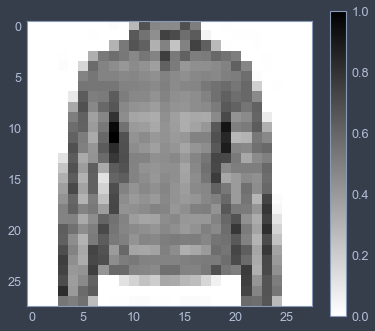

In [7]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

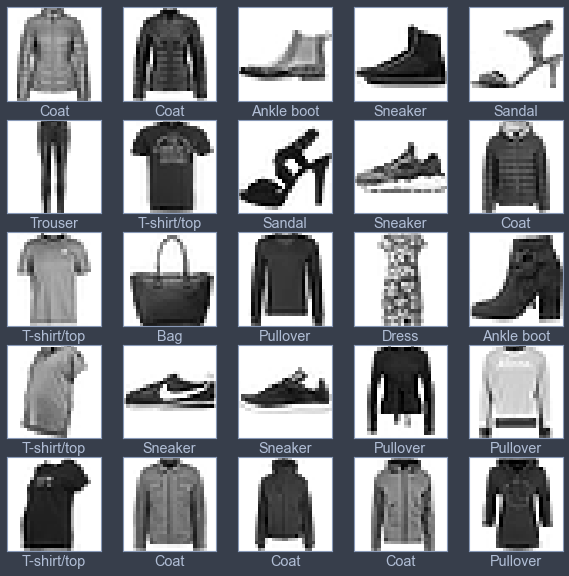

In [8]:
plt.figure(figsize=(10, 10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28, 28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1

plt.show()

## Building the model

This model consists of the following layers:

1. Conv2D layer with 32 units of (3, 3) filters
2. MaxPooling2D layer of size (2, 2) with strides=2 
3. Conv2D layer with 64 units of (3, 3) filters
4. MaxPooling2D layer of size (2, 2) with strides=2 
5. Flatten layer
6. Dense layer of 128 neurons with ReLU activation
7. Dense layer of 10 neurons with softmax activation

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu,
                            input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu,
                            input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [10]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [11]:
history = model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 32s 11ms/step - loss: 0.4067 - accuracy: 0.8532
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2645 - accuracy: 0.9040
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2230 - accuracy: 0.9179
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1885 - accuracy: 0.9302
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1651 - accuracy: 0.9386
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1457 - accuracy: 0.9468
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1216 - accuracy: 0.9550
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1055 - accuracy: 0.9606
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0891 - accuracy: 0.9671
Epoch 10/10
1875/1875 [==============================] - 21s 11m

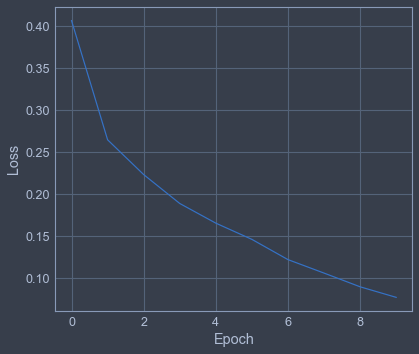

In [12]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [13]:
train_loss, train_accuracy = model.evaluate(train_dataset, steps=math.ceil(num_train_examples/BATCH_SIZE), verbose=0)
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE), verbose=0)
print("Accuracy on the train set: {:.2f}%".format(train_accuracy * 100))
print("Accuracy on the test set: {:.2f}%".format(test_accuracy * 100))

Accuracy on the train set: 98.06%
Accuracy on the test set: 91.71%
